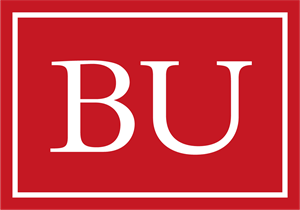

#**Assignment - 5**

---

<h2>AD699 A3 Data Mining (Spring 2024)</div>

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


# **TASK I:  Hierarchical Clustering**

#### Solution - 1

In [3]:
shipping <- read.csv("shipping_data.csv")

In [4]:
head(shipping)

name                        price.... weight..kg. length..m. width..m.
1 Camera Bag                   37.66    1.10         0.40      0.39     
2 Portable Bluetooth Keyboard 144.65    0.39         0.11      0.06     
3 Large Flat Rate Box          38.57    0.97         0.79      0.55     
4 Ceramic Tiles                10.34    6.22         0.36      0.37     
5 Garden Hose                  21.63    1.18        17.77      0.27     
6 Cookware Set                401.64    7.60         0.49      0.35     
  height..m. shipment.date destination.port             
1 0.26       2023-03-19    Port of Singapore (Singapore)
2 0.03       2023-03-21    Port of Busan (South Korea)  
3 0.35       2023-03-25    Port of Tianjin (China)      
4 0.02       2023-03-15    Port of Shanghai (China)     
5 0.13       2023-03-25    Port of Tianjin (China)      
6 0.15       2023-03-20    Port of Shanghai (China)

#### Solution - 2

In [5]:
# Dimentions of Dataset
dim(shipping)

[1] 263821      8

The dataset has 8 coloumns and 263821 rows

#### Solution - 3

In [6]:
set.seed(1131)
sampled_rows <- sample(nrow(shipping), 20, replace = FALSE)
sampled_data <- shipping[sampled_rows, ]
sampled_data

name                        price.... weight..kg. length..m. width..m.
114843 Laptop                      520.25      1.34      0.30       0.30     
219668 Spices Collection            33.35      0.86      0.24       0.28     
207784 Weed Whacker                 62.44      3.78      0.83       0.26     
67501  Television                  889.25     25.13      1.03       0.30     
96790  Desk Chair                  197.52     17.79      0.51       0.97     
75522  Yoga Mat                     41.20      1.93      1.48       0.60     
59919  Pallete of Beer Cases       239.61    543.47      1.03       0.80     
253572 Hiking Boots                 58.37      1.56      0.36       0.21     
124660 Bookshelf                   290.16     33.99      0.82       0.79     
204036 Movie Night Pack             19.75      3.50      0.98       0.56     
19376  Big Bag with Chemicals      176.05    907.69      1.07       0.84     
171310 Tennis Racket               101.32      0.40      0.67       0.26     
155251 Bicycle                     714.57      8.41      1.58       0.33     
146622 Mixed Dried Fruits           14.41      0.53      0.40       0.22     
41413  Camera Bag                   39.73      1.20      0.27       0.34     
65981  TV                          906.70     21.58      1.36       1.24     
86548  Medium Box                   12.36      0.52      0.58       0.30     
149055 Kitchen Timer                 8.89      0.11      0.14       0.20     
244491 Hoe                          24.69      2.82      1.09       0.28     
150602 Pallete of Breakfast Cereal 154.76    351.97      1.11       0.99     
       height..m. shipment.date destination.port             
114843 0.04       2023-03-18    Port of Tokyo (Japan)        
219668 0.14       2023-03-18    Port of Tokyo (Japan)        
207784 0.27       2023-03-21    Port of Tokyo (Japan)        
67501  0.15       2023-03-12    Port of Singapore (Singapore)
96790  0.95       2023-03-22    Port of Singapore (Singapore)
75522  0.01       2023-03-21    Port of Shanghai (China)     
59919  1.07       2023-03-12    Port of Busan (South Korea)  
253572 0.27       2023-03-14    Port of Singapore (Singapore)
124660 1.27       2023-03-26    Port of Tokyo (Japan)        
204036 0.26       2023-03-21    Port of Tokyo (Japan)        
19376  0.29       2023-03-13    Port of Singapore (Singapore)
171310 0.01       2023-03-12    Port of Tokyo (Japan)        
155251 1.11       2023-03-17    Port of Tianjin (China)      
146622 0.17       2023-03-12    Port of Tianjin (China)      
41413  0.28       2023-03-28    Port of Tianjin (China)      
65981  0.44       2023-03-12    Port of Tokyo (Japan)        
86548  0.20       2023-03-27    Port of Singapore (Singapore)
149055 0.12       2023-03-12    Port of Tianjin (China)      
244491 0.50       2023-03-19    Port of Shanghai (China)     
150602 1.24       2023-03-15    Port of Singapore (Singapore)

#### Solution - 4

In [7]:
any(is.na(sampled_data))

[1] FALSE

 **üí°Interpretation of Resultsüí°-**

There are no NA values in my sampled Data

#### Solution - 5

In [22]:
head(sampled_data)

name              price.... weight..kg. length..m. width..m. height..m.
114843 Laptop            520.25     1.34       0.30       0.30      0.04      
219668 Spices Collection  33.35     0.86       0.24       0.28      0.14      
207784 Weed Whacker       62.44     3.78       0.83       0.26      0.27      
67501  Television        889.25    25.13       1.03       0.30      0.15      
96790  Desk Chair        197.52    17.79       0.51       0.97      0.95      
75522  Yoga Mat           41.20     1.93       1.48       0.60      0.01      
       shipment.date destination.port             
114843 2023-03-18    Port of Tokyo (Japan)        
219668 2023-03-18    Port of Tokyo (Japan)        
207784 2023-03-21    Port of Tokyo (Japan)        
67501  2023-03-12    Port of Singapore (Singapore)
96790  2023-03-22    Port of Singapore (Singapore)
75522  2023-03-21    Port of Shanghai (China)

In [21]:
summary(sampled_data)

     name             price....       weight..kg.        length..m.    
 Length:20          Min.   :  8.89   Min.   :  0.110   Min.   :0.1400  
 Class :character   1st Qu.: 31.18   1st Qu.:  1.115   1st Qu.:0.3900  
 Mode  :character   Median : 81.88   Median :  3.160   Median :0.8250  
                    Mean   :225.27   Mean   : 96.429   Mean   :0.7925  
                    3rd Qu.:252.25   3rd Qu.: 22.468   3rd Qu.:1.0750  
                    Max.   :906.70   Max.   :907.690   Max.   :1.5800  
   width..m.        height..m.     shipment.date      destination.port  
 Min.   :0.2000   Min.   :0.0100   Length:20          Length:20         
 1st Qu.:0.2750   1st Qu.:0.1475   Class :character   Class :character  
 Median :0.3150   Median :0.2700   Mode  :character   Mode  :character  
 Mean   :0.5035   Mean   :0.4395                                        
 3rd Qu.:0.7925   3rd Qu.:0.6125                                        
 Max.   :1.2400   Max.   :1.2700                          

In [23]:
shipping2 <- scale(sampled_data[,2:6])

In [24]:
head(shipping2)

price....   weight..kg. length..m.  width..m.  height..m.
114843  1.00459233 -0.4026088  -1.13794315 -0.6351130 -0.9290175
219668 -0.65360262 -0.4046412  -1.27657582 -0.6975319 -0.6964725
207784 -0.55453322 -0.3922778   0.08664542 -0.7599509 -0.3941639
67501   2.26126502 -0.3018815   0.54875431 -0.6351130 -0.6732180
96790  -0.09450247 -0.3329592  -0.65272881  1.4559224  1.1871426
75522  -0.62686853 -0.4001108   1.58849932  0.3011715 -0.9987811

**üí°Interpretationüí°-**

Looking at the dataset summary, we can see that the numeric variables such as price, weight, length, width and height are on different scales. We will need to scale the dataset for clustering. Scaling these numeric variables would ensure that each variable contributes equally to analysis and prevent variables with larger scales from dominating the results.

#### Solution - 6

In [25]:
d <- dist(shipping2, method = "euclidean")

In [26]:
hiermodel <- hclust(d,method = "single")

#### Solution - 6 a.

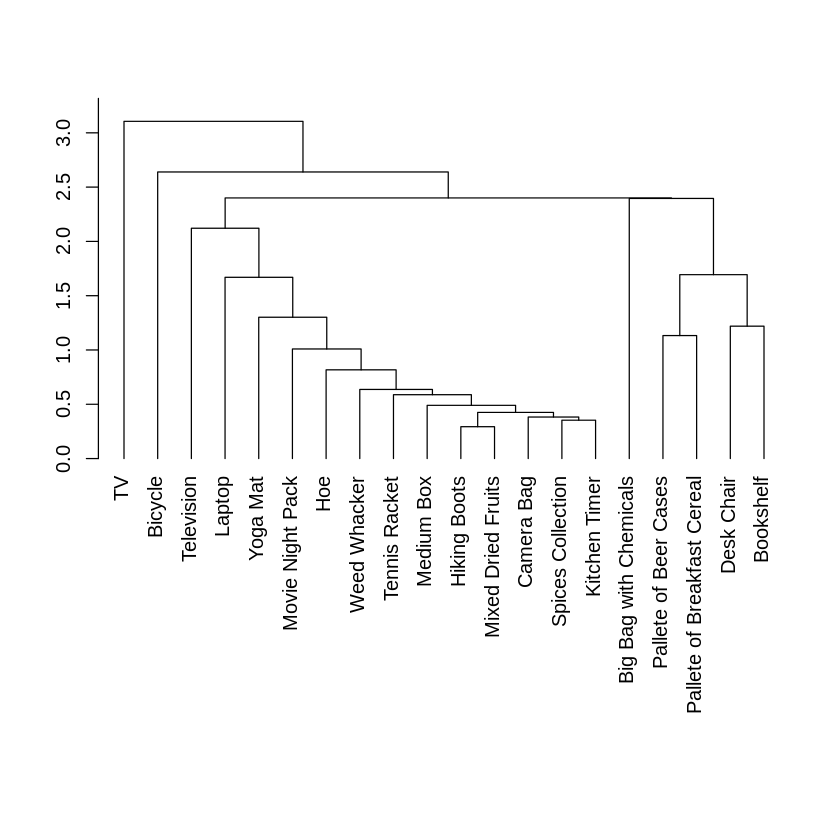

In [28]:
# Dendrogram
hiermodel$name <- sampled_data$name

plot(hiermodel, hang = -20, ann=FALSE, labels = hiermodel$name)

#### Solution - 6 b.

**üí°Solutionüí°-**

I observe three distinct clusters.

The first cluster includes items such as ‚ÄúTV,‚Äù ‚ÄúBicycle,‚Äù ‚ÄúTelevision,‚Äù ‚ÄúYoga Mat,‚Äù and ‚ÄúMovie Night Pack.‚Äù
The second cluster consists of ‚ÄúWeed Whacker,‚Äù ‚ÄúTennis Racket,‚Äù ‚ÄúMoving Box,‚Äù ‚ÄúMixed Dried Fruits,‚Äù ‚ÄúSpice Collection,‚Äù and ‚ÄúKitchen Timer.‚Äù
The third cluster contains ‚ÄúBig Bag with Cheetahs,‚Äù ‚ÄúPlate of Breakfast Cereal,‚Äù ‚ÄúDesk Chair,‚Äù and ‚ÄúBookshelf.‚Äù

#### Solution - 6 c.

In [31]:
clusters <- cutree(hiermodel, k=5)
clusters

114843 219668 207784  67501  96790  75522  59919 253572 124660 204036  19376 
     1      1      1      1      2      1      2      1      2      1      3 
171310 155251 146622  41413  65981  86548 149055 244491 150602 
     1      4      1      1      5      1      1      1      2

In [32]:
cbind(name = sampled_data$name, clusters)

name                        clusters
114843 Laptop                      1       
219668 Spices Collection           1       
207784 Weed Whacker                1       
67501  Television                  1       
96790  Desk Chair                  2       
75522  Yoga Mat                    1       
59919  Pallete of Beer Cases       2       
253572 Hiking Boots                1       
124660 Bookshelf                   2       
204036 Movie Night Pack            1       
19376  Big Bag with Chemicals      3       
171310 Tennis Racket               1       
155251 Bicycle                     4       
146622 Mixed Dried Fruits          1       
41413  Camera Bag                  1       
65981  TV                          5       
86548  Medium Box                  1       
149055 Kitchen Timer               1       
244491 Hoe                         1       
150602 Pallete of Breakfast Cereal 2

#### Solution - 6 d.

In [37]:
# Install and load the magrittr package
install.packages("magrittr")
library(magrittr)

# Install and load the dplyr package
install.packages("dplyr")
library(dplyr)


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)


Attaching package: ‚Äòdplyr‚Äô


The following objects are masked from ‚Äòpackage:stats‚Äô:

    filter, lag


The following objects are masked from ‚Äòpackage:base‚Äô:

    intersect, setdiff, setequal, union




In [33]:
# Summarize data by clusters
od<-sampled_data[,2:6]
od$clusters <- clusters

In [39]:
grouped <-od %>%
  group_by(clusters) %>%
  summarize_all(list(mean=mean, sd=sd, median=median))
grouped

clusters price...._mean weight..kg._mean length..m._mean width..m._mean
1 1        140.4623         3.360          0.6438462       0.3161538     
2 2        220.5125       236.805          0.8675000       0.8875000     
3 3        176.0500       907.690          1.0700000       0.8400000     
4 4        714.5700         8.410          1.5800000       0.3300000     
5 5        906.7000        21.580          1.3600000       1.2400000     
  height..m._mean price...._sd weight..kg._sd length..m._sd width..m._sd
1 0.1861538       262.73225      6.646428     0.4097466     0.1239313   
2 1.1325000        57.92966    255.869689     0.2678775     0.1071992   
3 0.2900000              NA            NA            NA            NA   
4 1.1100000              NA            NA            NA            NA   
5 0.4400000              NA            NA            NA            NA   
  height..m._sd price...._median weight..kg._median length..m._median
1 0.1349406      39.730            1.34             0.580            
2 0.1501943     218.565          192.98             0.925            
3        NA     176.050          907.69             1.070            
4        NA     714.570            8.41             1.580            
5        NA     906.700           21.58             1.360            
  width..m._median height..m._median
1 0.280            0.170            
2 0.885            1.155            
3 0.840            0.290            
4 0.330            1.110            
5 1.240            0.440

**üí°Solutionüí°-**

After adding the clusters to "od" and then grouped by ckusters and summarized the data to find mean, median and sd. The clustering revealed distinct categories of packages based on price, weight, and dimensions. We can identify three main clusters:

**Cluster 1:**

Characterized by a low mean price `($140.46)` with significant price variation `(SD = $262.73)`.
Relatively lightweight (mean weight = 3.36 kg) and compact (average dimensions: 0.64m x 0.32m x 0.19m).
Examples likely include items like desk chairs, bookshelves, and kitchen timers.

**Cluster 2:**

Significantly higher mean price `($220.51)` with lower price variability `(SD = $57.93)`.
Considerably heavier (mean weight = 236.81 kg) and larger on average (0.87m x 0.89m x 1.13m).
This cluster might contain items like movie night packs, pallets of beer, or breakfast cereal.


Overall, clusters 1 & 2 appear to represent meaningful groupings of packages based on their dimensions and prices. Clusters 3, 4 and 5 may consist of singleton observations or have missing data, requiring further investigation.

#### Solution - 6 e.

In [41]:
install.packages("tidyverse")
library("tidyverse")

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî forcats   1.0.0     ‚úî readr     2.1.5
‚úî ggplot2   3.4.4     ‚úî stringr   1.5.1
‚úî lubridate 1.9.3     ‚úî tibble    3.2.1
‚úî purrr     1.0.2     ‚úî tidyr     1.3.1
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ tidyr::extract()   masks magrittr::extract()
‚úñ dplyr::filter()    masks stats::filter()
‚úñ dplyr::lag()       masks stats::lag()
‚úñ purrr::set_names() masks magrittr::set_names()
‚Ñπ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


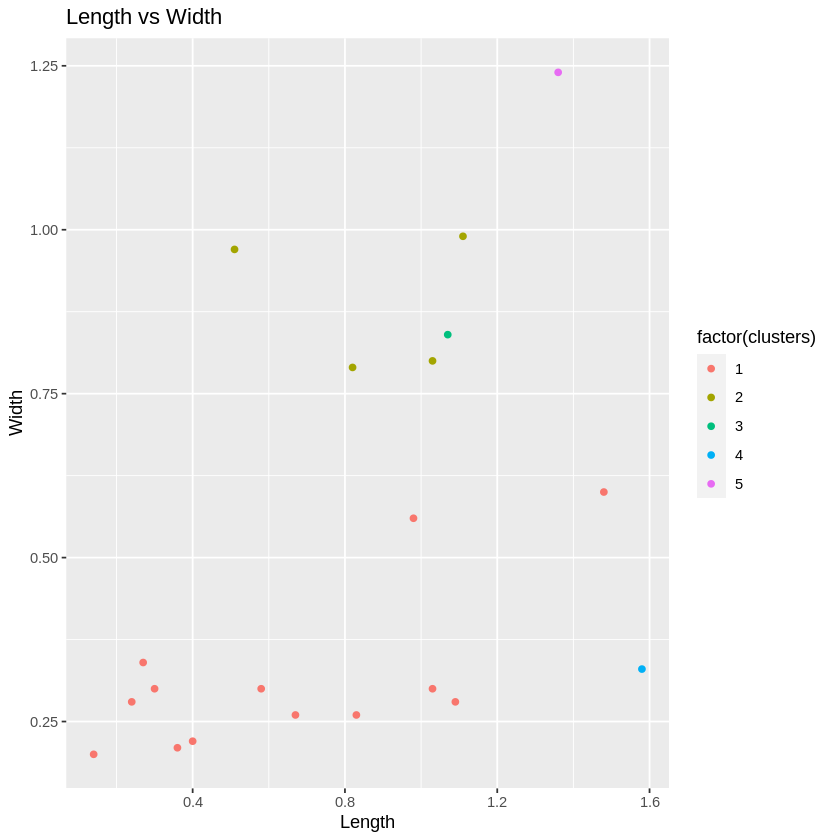

In [50]:
library(ggplot2)

ggplot(data = od, aes(x = length..m., y = width..m., color = factor(clusters))) +
  geom_point() +
  xlab("Length") +
  ylab("Width") +
  ggtitle("Length vs Width")


The scatter plot which plots length and width in y axis reveals 5 clusters. Cluster 1 (orange) - affordable, lightweight, compact everyday items. Cluster 2 (green) - pricier, bulkier or heavier goods, based on the size of the package. Clusters 3, 4 & 5 have only 1 value

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


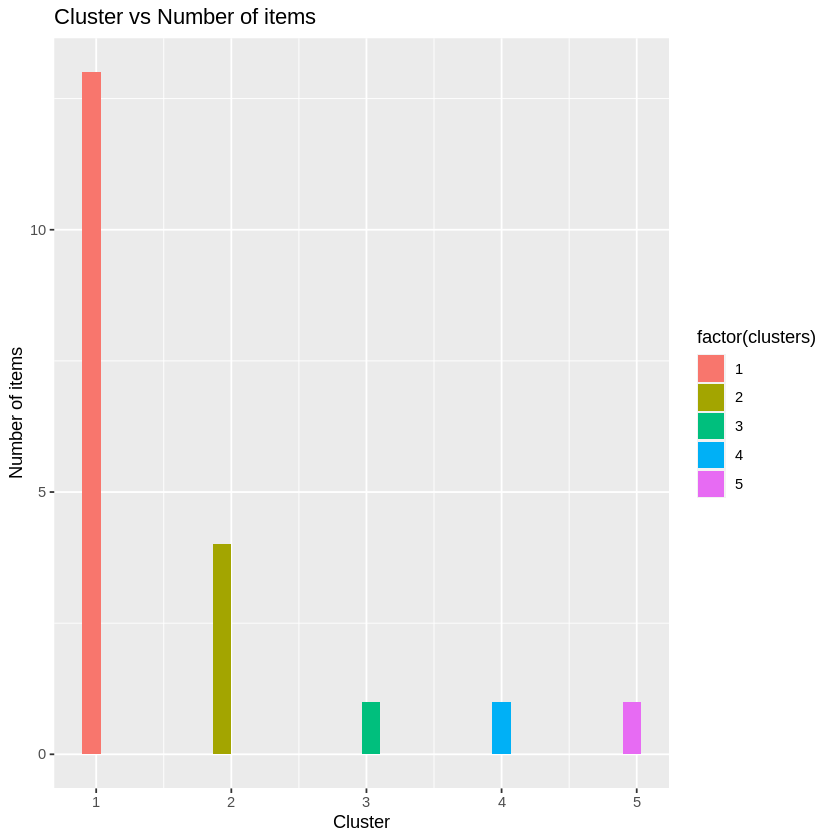

In [46]:
library(ggplot2)

ggplot(od, aes(x = clusters, fill = factor(clusters))) +
  geom_histogram() +
  xlab("Cluster") +
  ylab("Number of items") +
  ggtitle("Cluster vs Number of items")


The histogram reveals no. of items for all 5 clusters. Cluster 1 (orange) has the almost 13 items. Cluster 2 (green) - has 4 items. Clusters 3, 4 & 5 have 1 item each.

Warning message:
‚ÄúGroups with fewer than two data points have been dropped.‚Äù
Warning message:
‚ÄúGroups with fewer than two data points have been dropped.‚Äù
Warning message:
‚ÄúGroups with fewer than two data points have been dropped.‚Äù


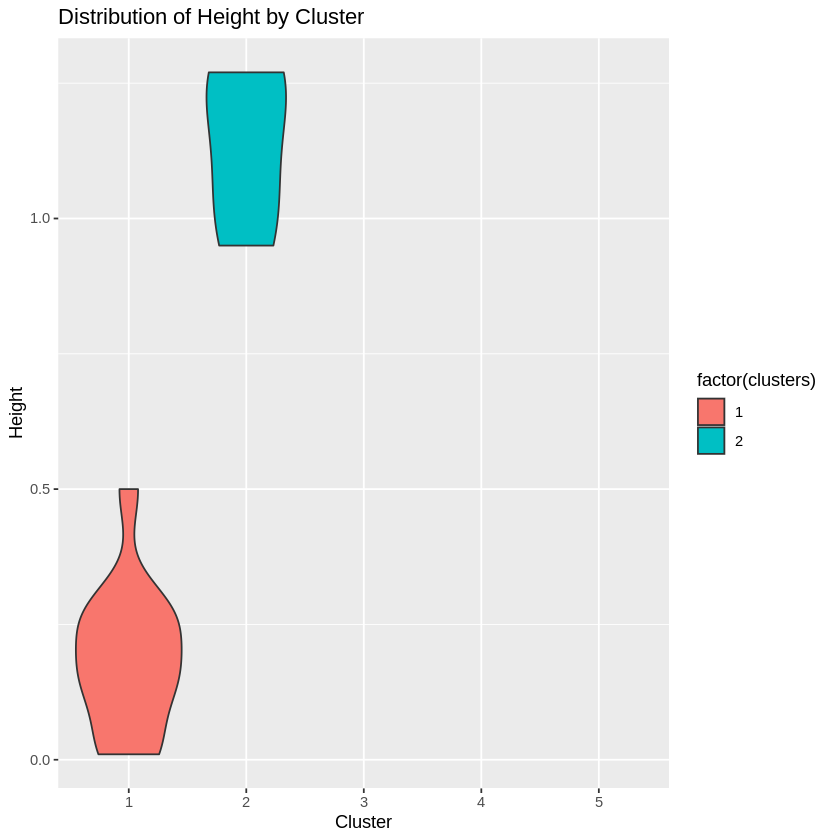

In [48]:
ggplot(od, aes(x = factor(clusters), y = height..m., fill = factor(clusters))) +
  geom_violin() +
  xlab("Cluster") +
  ylab("Height") +
  ggtitle("Distribution of Height by Cluster")


Violin plot shows distribution of hieght across different cluster. Since cluster 3, 4 & 5 are singletons they are not shown in the graph. We can see that Cluster 2 has the highest density while cluster 1 has the highest range values

#### Solution - 6 f.

In [51]:
sampled_data$clusters<-clusters
View(sampled_data)

name                        price.... weight..kg. length..m. width..m.
114843 Laptop                      520.25      1.34      0.30       0.30     
219668 Spices Collection            33.35      0.86      0.24       0.28     
207784 Weed Whacker                 62.44      3.78      0.83       0.26     
67501  Television                  889.25     25.13      1.03       0.30     
96790  Desk Chair                  197.52     17.79      0.51       0.97     
75522  Yoga Mat                     41.20      1.93      1.48       0.60     
59919  Pallete of Beer Cases       239.61    543.47      1.03       0.80     
253572 Hiking Boots                 58.37      1.56      0.36       0.21     
124660 Bookshelf                   290.16     33.99      0.82       0.79     
204036 Movie Night Pack             19.75      3.50      0.98       0.56     
19376  Big Bag with Chemicals      176.05    907.69      1.07       0.84     
171310 Tennis Racket               101.32      0.40      0.67       0.26     
155251 Bicycle                     714.57      8.41      1.58       0.33     
146622 Mixed Dried Fruits           14.41      0.53      0.40       0.22     
41413  Camera Bag                   39.73      1.20      0.27       0.34     
65981  TV                          906.70     21.58      1.36       1.24     
86548  Medium Box                   12.36      0.52      0.58       0.30     
149055 Kitchen Timer                 8.89      0.11      0.14       0.20     
244491 Hoe                          24.69      2.82      1.09       0.28     
150602 Pallete of Breakfast Cereal 154.76    351.97      1.11       0.99     
       height..m. shipment.date destination.port              clusters
114843 0.04       2023-03-18    Port of Tokyo (Japan)         1       
219668 0.14       2023-03-18    Port of Tokyo (Japan)         1       
207784 0.27       2023-03-21    Port of Tokyo (Japan)         1       
67501  0.15       2023-03-12    Port of Singapore (Singapore) 1       
96790  0.95       2023-03-22    Port of Singapore (Singapore) 2       
75522  0.01       2023-03-21    Port of Shanghai (China)      1       
59919  1.07       2023-03-12    Port of Busan (South Korea)   2       
253572 0.27       2023-03-14    Port of Singapore (Singapore) 1       
124660 1.27       2023-03-26    Port of Tokyo (Japan)         2       
204036 0.26       2023-03-21    Port of Tokyo (Japan)         1       
19376  0.29       2023-03-13    Port of Singapore (Singapore) 3       
171310 0.01       2023-03-12    Port of Tokyo (Japan)         1       
155251 1.11       2023-03-17    Port of Tianjin (China)       4       
146622 0.17       2023-03-12    Port of Tianjin (China)       1       
41413  0.28       2023-03-28    Port of Tianjin (China)       1       
65981  0.44       2023-03-12    Port of Tokyo (Japan)         5       
86548  0.20       2023-03-27    Port of Singapore (Singapore) 1       
149055 0.12       2023-03-12    Port of Tianjin (China)       1       
244491 0.50       2023-03-19    Port of Shanghai (China)      1       
150602 1.24       2023-03-15    Port of Singapore (Singapore) 2

This data snippet details a single laptop in cluster 1. It's priced at $520.25, weighs only 1.34 kg, and boasts a compact size (30cm x 30cm x 4cm).  **Cluster 1 is likely groups affordable and compact items based on previous information, this laptop fits perfectly with its low price and small dimensions.**

#### Solution - 7

**üí°Solutionüí°-**

**There are two main challenges when analyzing data where variables have different measurement scales.**

* **Unequal Weighting:**  Variables like price (dollars) and weight (kilograms) are measured in different units.  This can lead to variables with larger units having a stronger influence on calculations, even if they aren't necessarily more important.
* **Outlier Sensitivity:** Standardizing variables can make the analysis more sensitive to outliers. Extreme values in one variable can have a disproportionate impact on the overall analysis, potentially distorting the results.

**Additionally, it's important to consider the potential bias caused by varying variable importance.**  Some variables might inherently have a greater influence on the clustering process compared to others.


#### Solution - 8

In [55]:
# Creating weighting system
weights <- c(0.2, 0.15, 0.4, 0.4,0.3)
shipping3 <- as.data.frame(lapply(od, "*", weights))
head(shipping3)

price.... weight..kg. length..m. width..m. height..m. clusters
1 104.0500   0.268      0.060      0.060     0.008      0.20    
2   5.0025   0.129      0.036      0.042     0.021      0.15    
3  24.9760   1.512      0.332      0.104     0.108      0.40    
4 355.7000  10.052      0.412      0.120     0.060      0.40    
5  59.2560   5.337      0.153      0.291     0.285      0.60    
6   8.2400   0.386      0.296      0.120     0.002      0.20

**üí°Interpretationaüí°-**

**Breakdown of the weights assigned:**

**High Weights for Length and Width (0.4):** These dimensions are the most crucial factors influencing shipping costs. Assigning a weight of 0.4 to each ensures they have the strongest influence on the clustering process.

**Moderate Weight for Height (0.3):** While height contributes to package size, it might not be as significant as length and width. A weight of 0.3 reflects this moderate importance.

**Low Weight for Weight (0.15):** While weight can impact shipping costs, it's likely less influential compared to size (length, width, and height) in your specific dataset. Therefore, it receives the lowest weight (0.15).

**Moderate Weight for Price (0.2):** Price might hold some importance in your analysis, but likely not as much as package size. Assigning a weight of 0.2 reflects this consideration.

#### Solution - 9 a.

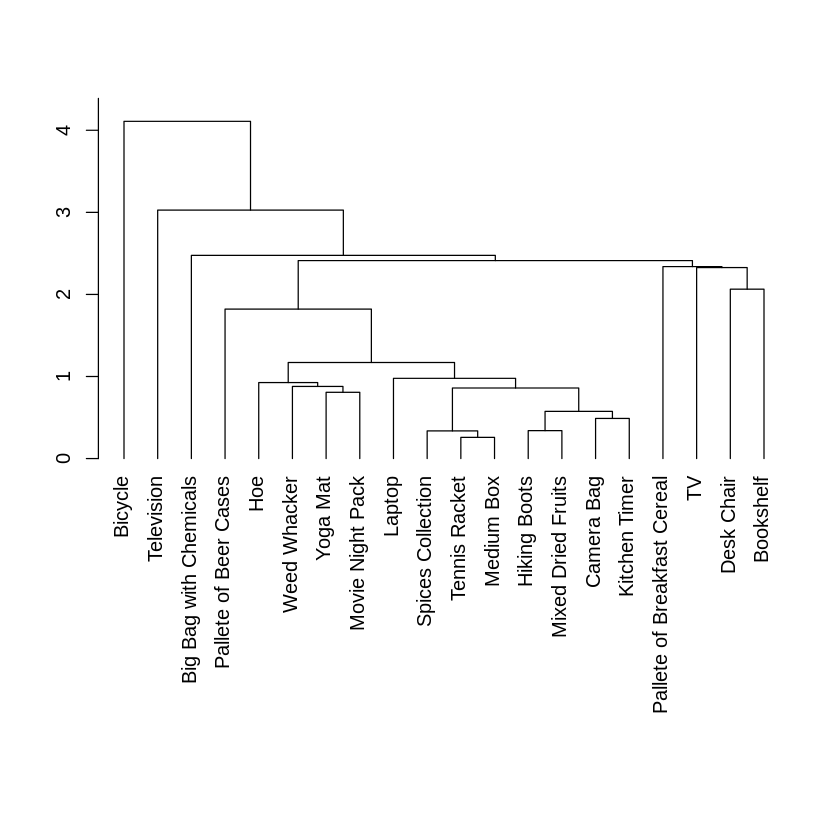

In [56]:
# Creating a new dendogram with newly assigned weights
rescaled_data<-scale(shipping3)
d1<-dist(rescaled_data,method="euclidean")
hiermodel1 <- hclust(d1,method = "single")
hiermodel1$name<-sampled_data$name
plot(hiermodel1,hang=-20,ann=FALSE,labels=hiermodel1$name)


The dendrogram reveals three distinct clusters based on underlying characteristics of the items:

* **Cluster 1: Unexpected Companions ("Bicycle," "Television," "Big Bag with Cheetahs," "Plate of Beer Glasses")**
   This cluster presents an intriguing mix. The "Television" and "Bicycle" could share size or price considerations. Perhaps the "Big Bag with Cheetahs" and "Plate of Beer Glasses" are linked by being party-related items.

* **Cluster 2: A Blend of Function and Leisure ("Weed Whacker," "Yoga Mat," "Movie Night Pack," "Spice Collection," "Tennis Racket," "Medium Box," "Mixed Dried Fruits," "Kitchen Timer," "Cheetah Bag")**
   This cluster is a diverse mix of household objects (kitchen timer, spice collection, medium box) and recreational items (yoga mat, tennis racket, movie night pack). The similarity might lie in function (kitchen & exercise) or purpose (entertainment & storage).

* **Cluster 3: The Home Haven ("Plate of Breakfast Cereal," "Desk Chair," "Bookshelf")**
   This cluster presents a clear connection ‚Äì  items typically found within a home environment, potentially related to office supplies (desk chair) or domestic use (bookshelf and breakfast cereal).

**Shifting Sands of Similarity:**

Comparing this dendrogram to the previous one reveals some interesting differences:

* **Rearranged Relationships:** The first dendrogram grouped items like "TV" and "Bicycle" together. Here, they belong to separate clusters. This suggests the underlying similarity measure (e.g., size, price) or distance metric may have changed.

**The Takeaway:**

By analyzing these clusters, we gain valuable insights into how different features or characteristics influence how items are grouped. This information can be used for various purposes, such as optimizing storage layouts, targeted advertising, or product recommendations.


#### Solution - 9 b.

In [59]:
clusters1 <- cutree(hiermodel1, k=5)
clusters1
cbind(name = sampled_data$name, clusters1)

[1] 1 1 1 2 3 1 1 1 3 1 4 1 5 1 1 3 1 1 1 3

name                        clusters1
 [1,] Laptop                      1        
 [2,] Spices Collection           1        
 [3,] Weed Whacker                1        
 [4,] Television                  2        
 [5,] Desk Chair                  3        
 [6,] Yoga Mat                    1        
 [7,] Pallete of Beer Cases       1        
 [8,] Hiking Boots                1        
 [9,] Bookshelf                   3        
[10,] Movie Night Pack            1        
[11,] Big Bag with Chemicals      4        
[12,] Tennis Racket               1        
[13,] Bicycle                     5        
[14,] Mixed Dried Fruits          1        
[15,] Camera Bag                  1        
[16,] TV                          3        
[17,] Medium Box                  1        
[18,] Kitchen Timer               1        
[19,] Hoe                         1        
[20,] Pallete of Breakfast Cereal 3

#### Solution - 9 c.

In [60]:
# Summarize data by clusters
od1<-sampled_data[,2:6]
od1$clusters1 <- clusters1

In [62]:
grouped1 <-od1 %>%
  group_by(clusters1) %>%
  summarize_all(list(mean=mean, sd=sd, median=median))
grouped1

clusters1 price...._mean weight..kg._mean length..m._mean width..m._mean
1 1          90.490         43.23231        0.6438462       0.3546154     
2 2         889.250         25.13000        1.0300000       0.3000000     
3 3         387.285        106.33250        0.9500000       0.9975000     
4 4         176.050        907.69000        1.0700000       0.8400000     
5 5         714.570          8.41000        1.5800000       0.3300000     
  height..m._mean price...._sd weight..kg._sd length..m._sd width..m._sd
1 0.2569231       142.8933     150.3073       0.4097466     0.1823282   
2 0.1500000             NA           NA              NA            NA   
3 0.9750000       350.8579     163.9044       0.3670604     0.1850000   
4 0.2900000             NA           NA              NA            NA   
5 1.1100000             NA           NA              NA            NA   
  height..m._sd price...._median weight..kg._median length..m._median
1 0.2788782      39.73             1.340            0.580            
2        NA     889.25            25.130            1.030            
3 0.3847510     243.84            27.785            0.965            
4        NA     176.05           907.690            1.070            
5        NA     714.57             8.410            1.580            
  width..m._median height..m._median
1 0.28             0.200            
2 0.30             0.150            
3 0.98             1.095            
4 0.84             0.290            
5 0.33             1.110

**Cluster Breakdown:**

1. **Cluster 1: Affordable Everyday Items (Clear & Complete)**
    * This cluster groups items with **moderate prices** and **compact dimensions**.
    * The absence of missing values (NA) suggests complete data for this cluster.
    * Examples likely include items like desk chairs, bookshelves, and kitchen timers.

2. **Cluster 2, 3 & 5: Potential Singletons with Missing Data (Uncertain)**
    * Both clusters 2 and 3 exhibit high average prices:
        * **Cluster 2:** Moderate weight with missing dimension data (NA).
        * **Cluster 3:** High weight with missing dimension data (NA).
        * **Cluster 5:** missing dimension data
    * The high prices and missing details suggest these might be **singletons** (single items) or have **incomplete data**.
    
3. **Cluster 4: The Lightweight Outlier (Unique)**
    * This cluster appears to contain a single item with a **low price** and **low weight**.
    * It stands out from other clusters due to its contrasting characteristics.
    * Missing dimension data (NA) limits further understanding.


In [64]:
sampled_data$clusters1<-clusters1
View(sampled_data)

name                        price.... weight..kg. length..m. width..m.
114843 Laptop                      520.25      1.34      0.30       0.30     
219668 Spices Collection            33.35      0.86      0.24       0.28     
207784 Weed Whacker                 62.44      3.78      0.83       0.26     
67501  Television                  889.25     25.13      1.03       0.30     
96790  Desk Chair                  197.52     17.79      0.51       0.97     
75522  Yoga Mat                     41.20      1.93      1.48       0.60     
59919  Pallete of Beer Cases       239.61    543.47      1.03       0.80     
253572 Hiking Boots                 58.37      1.56      0.36       0.21     
124660 Bookshelf                   290.16     33.99      0.82       0.79     
204036 Movie Night Pack             19.75      3.50      0.98       0.56     
19376  Big Bag with Chemicals      176.05    907.69      1.07       0.84     
171310 Tennis Racket               101.32      0.40      0.67       0.26     
155251 Bicycle                     714.57      8.41      1.58       0.33     
146622 Mixed Dried Fruits           14.41      0.53      0.40       0.22     
41413  Camera Bag                   39.73      1.20      0.27       0.34     
65981  TV                          906.70     21.58      1.36       1.24     
86548  Medium Box                   12.36      0.52      0.58       0.30     
149055 Kitchen Timer                 8.89      0.11      0.14       0.20     
244491 Hoe                          24.69      2.82      1.09       0.28     
150602 Pallete of Breakfast Cereal 154.76    351.97      1.11       0.99     
       height..m. shipment.date destination.port              clusters
114843 0.04       2023-03-18    Port of Tokyo (Japan)         1       
219668 0.14       2023-03-18    Port of Tokyo (Japan)         1       
207784 0.27       2023-03-21    Port of Tokyo (Japan)         1       
67501  0.15       2023-03-12    Port of Singapore (Singapore) 1       
96790  0.95       2023-03-22    Port of Singapore (Singapore) 2       
75522  0.01       2023-03-21    Port of Shanghai (China)      1       
59919  1.07       2023-03-12    Port of Busan (South Korea)   2       
253572 0.27       2023-03-14    Port of Singapore (Singapore) 1       
124660 1.27       2023-03-26    Port of Tokyo (Japan)         2       
204036 0.26       2023-03-21    Port of Tokyo (Japan)         1       
19376  0.29       2023-03-13    Port of Singapore (Singapore) 3       
171310 0.01       2023-03-12    Port of Tokyo (Japan)         1       
155251 1.11       2023-03-17    Port of Tianjin (China)       4       
146622 0.17       2023-03-12    Port of Tianjin (China)       1       
41413  0.28       2023-03-28    Port of Tianjin (China)       1       
65981  0.44       2023-03-12    Port of Tokyo (Japan)         5       
86548  0.20       2023-03-27    Port of Singapore (Singapore) 1       
149055 0.12       2023-03-12    Port of Tianjin (China)       1       
244491 0.50       2023-03-19    Port of Shanghai (China)      1       
150602 1.24       2023-03-15    Port of Singapore (Singapore) 2       
       clusters1
114843 1        
219668 1        
207784 1        
67501  2        
96790  3        
75522  1        
59919  1        
253572 1        
124660 3        
204036 1        
19376  4        
171310 1        
155251 5        
146622 1        
41413  1        
65981  3        
86548  1        
149055 1        
244491 1        
150602 3

Laptop is still in cluster 1. Television went from cluster 1 to 2 probably because of newly assigned weights. Desk chair went from 2 to 3 cluster. Camera Box is still in the same cluster, this is because it is a compact object

# **TASK II: Text Minnning**

In [89]:
library(dplyr)
install.packages("tidytext")
library(tidytext)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòRcpp‚Äô, ‚ÄòSnowballC‚Äô, ‚Äòjaneaustenr‚Äô, ‚Äòtokenizers‚Äô




In [92]:
install.packages("stopwords")
library(stopwords)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependency ‚ÄòISOcodes‚Äô




#### Solution - 1

In [68]:
##Solution - 1
#Bring "The Office" dataset into local environment.
office <- read.csv("the_office.csv")
head(office)

id season episode scene
1 1  1      1       1    
2 2  1      1       1    
3 3  1      1       1    
4 4  1      1       1    
5 5  1      1       1    
6 6  1      1       2    
  line_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1 All right Jim. Your quarterlies look very good. How are things at the library?                                                                                                                                                                                                                                                                                                                                                                                                                                     
2 Oh, I told you. I couldn't close it. So...                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
3 So you've come to the master for guidance? Is this what you're saying, grasshopper?                                                                                                                                                                                                                                                                                                                                                                                                                                
4 Actually, you called me in here, but yeah.                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
5 All right. Well, let me show you how it's done.                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
6 [on the phone] Yes, I'd like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger. [quick cut scene] All right. Done deal. Thank you very much, sir. You're a gentleman and a scholar. Oh, I'm sorry. OK. I'm sorry. My mistake. [hangs up] That was a woman I was talking to, so... She had a very low voice. Probably a smoker, so... [Clears throat] So that's the way it's done.
  speaker deleted
1 Michael FALSE  
2 Jim     FALSE  
3 Michael FALSE  
4 Jim     FALSE  
5 Michael FALSE  
6 Michael FALSE

In [86]:
my_df <- office %>% filter(season == 2 & episode == 7)
head(my_df)

id   season episode scene
1 4191 2      7       1    
2 4192 2      7       1    
3 4193 2      7       1    
4 4194 2      7       1    
5 4195 2      7       1    
6 4196 2      7       2    
  line_text                                                                                                                                                                                   
1 [entering office] Hey, have they left for the big meeting yet?  I've got Michael's lucky tie.                                                                                               
2 No.  They're in the conference room.                                                                                                                                                        
3 Good.                                                                                                                                                                                       
4 Wait, are those Michael's Levis?                                                                                                                                                            
5 Yeah, who dry-cleans jeans?                                                                                                                                                                 
6 Michael and his jeans.  He gets in them, and I'm not exactly sure what happens.  But I can tell you, he loves the way he looks in those jeans.  I know that's why he started casual Fridays.
  speaker deleted
1 Ryan    FALSE  
2 Jim     FALSE  
3 Ryan    FALSE  
4 Pam     FALSE  
5 Ryan    FALSE  
6 Pam     FALSE

#### Solution - 2

In [87]:
# Calculate the count of lines for each character
line_counts <- table(my_df$speaker)

# Sort the counts in descending order
line_counts <- sort(line_counts, decreasing = TRUE)
top_10 <- head(line_counts, 10)
top_10


  Michael       Jan       Jim       Pam    Dwight Christian      Ryan   Phyllis 
       86        55        52        40        24        19         8         6 
    Oscar     Kevin 
        5         2 

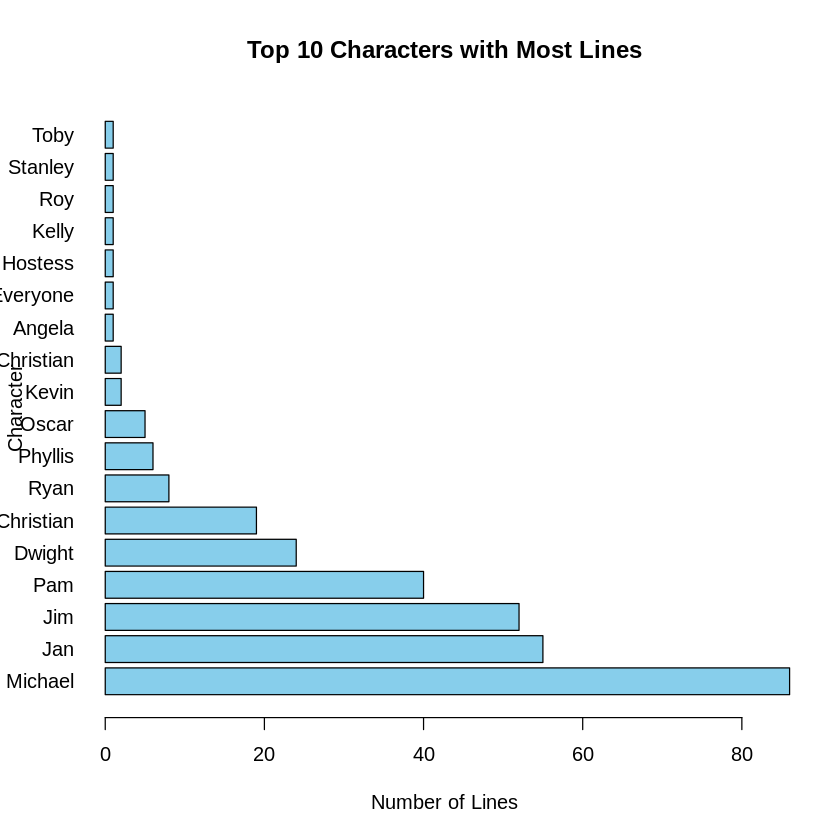

In [88]:
# Create a horizontal barplot
barplot(line_counts,
horiz = TRUE,
las = 1,
main = "Top 10 Characters with Most Lines",
xlab = "Number of Lines",
ylab = "Character",
col = "skyblue")

Michael has the highest line count followed by Jan. Toby, Stanley, Roy, Kelly, Hostess, Everyone & Angela have the lowest

#### Solution - 3

In [91]:
# Select only the line_text column
lines_df <- select(my_df, line_text)

# Create a tidy version of the episode text
tidy_episode <- lines_df %>%
  unnest_tokens(word, line_text)
head(tidy_episode)

word    
1 entering
2 office  
3 hey     
4 have    
5 they    
6 left

#### Solution - 4

In [93]:
# Find the 10 most frequently used words
top_words <- tidy_episode %>%
  count(word, sort = TRUE) %>%
  head(10)

# Show the results
top_words

word    n  
1  i       125
2  you      95
3  a        85
4  the      82
5  to       76
6  and      54
7  it       52
8  is       45
9  this     40
10 michael  37

#### Solution - 4 a.

**üí°Interpretationüí°-**

Relying solely on the most frequent words in text data can be misleading. This is because common words like "the," "and," and "of" appear frequently but offer little meaning in understanding the content.

To extract valuable insights from text data, we need to perform additional processing steps. One crucial step involves removing these "stop words." By eliminating them, we can focus on the more informative words that truly convey the essence of the text. This allows for a more accurate analysis of the underlying themes and topics.

#### Solution - 4 b.

In [94]:
stop_words <- data.frame(word = stopwords("en"))

In [97]:
# Remove stop words from the word frequency table
word_freq <- tidy_episode %>%
  anti_join(stop_words, by = "word") %>%
  count(word, sort=TRUE)

top_words2 <- head(word_freq, 10)
top_words2

word    n 
1  michael 37
2  know    28
3  ok      27
4  just    25
5  uh      23
6  jan     19
7  oh      16
8  think   16
9  go      15
10 pam     15

The results show the ten most frequent words that are likely more meaningful for understanding the content of your text data.  Words like "michael," "know," "ok," "just," and "uh" appear to be prominent, suggesting a conversational tone or a back-and-forth exchange between individuals. However, without additional context about the text source (e.g., dialogue transcript, meeting notes), it's difficult to draw definitive conclusions.

#### Solution - 4 c.

In [102]:
my_df2 <- my_df %>%
  select(line_text) %>%
  unnest_tokens(bigram, line_text, token = "ngrams", n = 2)%>%
  na.omit()

In [103]:
# Remove stop words
my_df2 <- cross_join(my_df2, stop_words)


In [104]:
# Count frequency of each bigram and show top 10
bigrams<-my_df2 %>%
  count(bigram, sort = TRUE)

In [106]:
top_words_bigram<-head(bigrams,10)
top_words_bigram

bigram        n   
1  this is       2625
2  do you        2100
3  i don't       2100
4  i know        2100
5  it was        1925
6  michael scarn 1925
7  i have        1750
8  you know      1750
9  agent michael 1575
10 is a          1575

**Bigrams**

In natural language processing (NLP), we often deal with breaking down text into its building blocks. Here's where unigrams and bigrams come in:

* **Unigrams: The Single Word Soldiers:**  A unigram is simply a single word. While unigrams provide the basic units of meaning, they lack context. Words like "new" and "car" analyzed as unigrams wouldn't reveal their relationship.

* **Bigrams: Capturing Word Partnerships:** A bigram takes things a step further. It analyzes **pairs of consecutive words** in a sequence. This allows us to capture the **context** in which a word appears. For example, the bigram "new car" reveals a more meaningful connection between the words, potentially indicating someone looking for a recent vehicle.

**Benefits of Bigram Analysis:**

* **Context is King:** By analyzing bigrams, we can understand the relationships between words and identify common phrases or patterns in language use. This is crucial for tasks like sentiment analysis (understanding positive or negative opinions) or machine translation (converting text from one language to another).

* **Beyond Single Words:**  Bigrams go beyond the limitations of unigrams by revealing how words are used together.  This provides a richer understanding of the text compared to analyzing words in isolation.

**In essence, bigram analysis unlocks a deeper level of understanding in text processing by considering the connections between words, not just the words themselves.**


#### Solution - 4 d.

Frequent words in an episode act as clues to themes and topics. They can help analyze sentiment, compare episodes, or identify storytelling patterns. Knowing the theme lets viewers decide if an episode aligns with their interests. For instance, a high frequency of "agent michael" might suggest an episode centered on a specific character or a comedic subplot.

#### Solution - 5

In [107]:
#Wordcloud
install.packages("tm")
install.packages("slam")
install.packages("wordcloud")

library(tm)
library(slam)
library(wordcloud)


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòNLP‚Äô, ‚Äòslam‚Äô, ‚ÄòBH‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Loading required package: NLP


Attaching package: ‚ÄòNLP‚Äô


The following object is masked from ‚Äòpackage:ggplot2‚Äô:

    annotate



Attaching package: ‚Äòtm‚Äô


The following object is masked from ‚Äòpackage:stopwords‚Äô:

    stopwords


Loading required package: RColorBrewer



Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
‚Äútransformation drops documents‚Äù
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
‚Äútransformation drops documents‚Äù


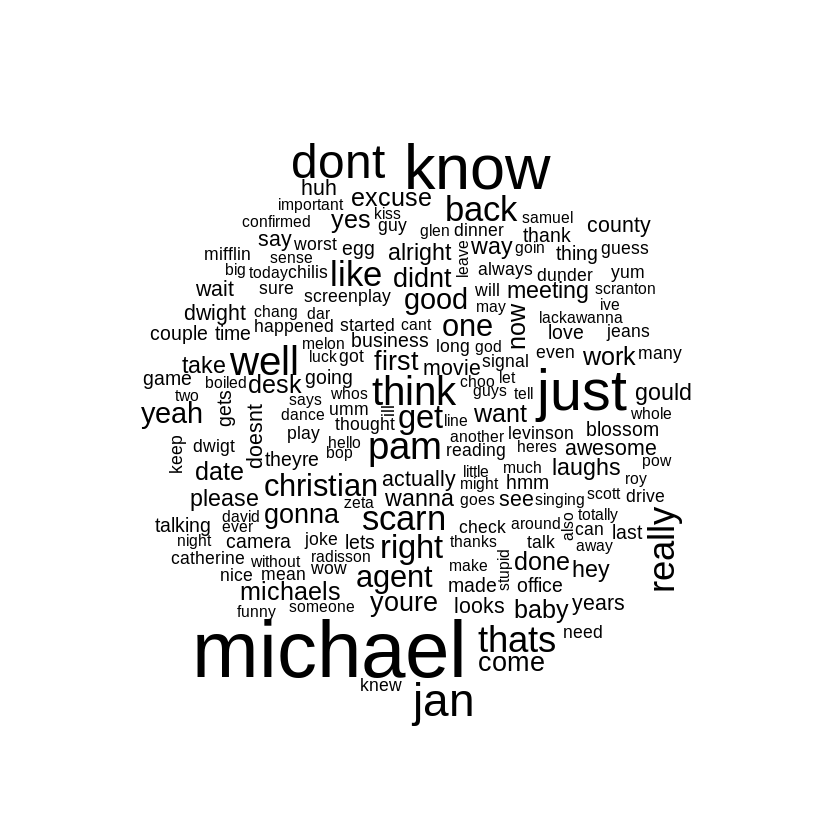

In [108]:
# Construct Word Cloud
wordcloud(tidy_episode$word)

Based on the word cloud you sent, it appears to be related to the American sitcom 'The Office'. The most prominent words are all character names from the show, including Michael, Dwight, Jim, Pam, and Creed. This suggests that the word cloud likely captures the main characters' names spoken throughout the series or a specific episode.
Focus on Humor: If words like "laughs", "funny" are prominent, it might suggest a focus on the show's humor and workplace antics.
Emotional Moments: Words like "kiss," "love, could indicate a scene or episode with emotional weight or character development.

#### Solution - 6 a.

In [109]:
# Sentiment Analysis
sentiment <- tidy_episode %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining with `by = join_by(word)`


In [111]:
top_10_sentiment<-sentiment%>%
head(10)
top_10_sentiment

word    sentiment n 
1  well    positive  15
2  like    positive  13
3  right   positive  12
4  good    positive  10
5  excuse  negative   8
6  work    positive   8
7  awesome positive   6
8  blossom positive   5
9  love    positive   5
10 thank   positive   5

#### Solution - 6 b.

Positive Sentiment Reigns Supreme:

Looking at the results, we see that all the top 10 words are classified as "positive." Words like "well," "like," "right," "good," "awesome," "blossom," "love," and "thank" all carry positive connotations. This suggests an overall positive sentiment within the analyzed text data. So in total 9 positive sentiments.

Negative Sentiments - Only 1 negative sentiment was found "	excuse" which was said 8 times

#### Solution - 6 c.

Based on the overwhelming presence of positive words like "well," "like," "good," and "awesome," this list suggests a lighthearted and positive episode filled with approval, appreciation, and potentially some humorous situations (given "excuse" being the only negative word).

#### Solution - 7

In [112]:
#sentiment analysis using afinn
install.packages("textdata")
library(textdata)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)



In [114]:
# Get the AFINN lexicon
afinn_lexicon <- get_sentiments("afinn")

Do you want to download:
 Name: AFINN-111 
 URL: http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010 
 License: Open Database License (ODbL) v1.0 
 Size: 78 KB (cleaned 59 KB) 
 Download mechanism: https 


ERROR: Error in menu(choices = c("Yes", "No"), title = title): menu() cannot be used non-interactively


In [116]:
# Read the AFINN lexicon file
afinn <- read.table("AFINN-96.txt", header = FALSE, sep = "\t", col.names = c("word", "score"))

# Check the structure of the AFINN lexicon
str(afinn)


Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
‚ÄúEOF within quoted string‚Äù
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
‚Äúnumber of items read is not a multiple of the number of columns‚Äù


'data.frame':	199 obs. of  2 variables:
 $ word : chr  "abandon" "abandons" "abandoned" "absentee" ...
 $ score: int  -2 -2 -2 -1 -1 1 -2 -2 -2 -3 ...


In [122]:
# Join the words with the AFINN lexicon to obtain sentiment scores
word_scores_afinn <- tidy_episode %>%
  inner_join(afinn, by = "word")
head(word_scores_afinn)

word   score
1 big     1   
2 big     1   
3 ass    -4   
4 blocks -1   
5 blocks -1   
6 agreed  1

In [124]:
# Find the worst 3 words based on the AFINN scores
worst_words_afinn <- word_scores_afinn %>%
  group_by(word) %>%
  summarize(sentiment = sum(score)) %>%
  arrange(sentiment) %>%
  slice_head(n = 3)


In [125]:
# Find the best 3 words based on the AFINN scores
best_words_afinn <- word_scores_afinn %>%
  group_by(word) %>%
  summarize(sentiment = sum(score)) %>%
  arrange(desc(sentiment)) %>%
  slice_head(n = 3)


In [128]:
cat("The worst 3 words in the episode based on AFINN scores:", worst_words_afinn$word)

The worst 3 words in the episode based on AFINN scores: ass bad accident

In [129]:
cat("The best 3 words in the episode based on AFINN scores:", best_words_afinn$word)

The best 3 words in the episode based on AFINN scores: awesome best big

In [130]:
# Sum all the sentiment values
total_sentiment <- sum(word_scores_afinn$score)

In [131]:
cat("The total sentiment score for the episode based on AFINN lexicon is:", total_sentiment)

The total sentiment score for the episode based on AFINN lexicon is: 19

**üí°Interpretationüí°-**
Positive score (19) from AFINN suggests a happy episode, but lexicons like AFINN miss context, negation, and deeper emotions.  For a fuller picture, consider analyzing sentence structure, word sequences, and genre alongside the lexicon score.